### Car Resale Value Prediction

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('train.csv')

In [135]:
df.shape

(188533, 13)

In [136]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [137]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [138]:
df['model'].value_counts().shape , df['brand'].value_counts().shape , df['transmission'].unique().shape , df['fuel_type'].value_counts().shape

((1897,), (57,), (52,), (7,))

### Conclusion:
From the data model , brand , transmission , fuel_type and engine are categorical values that will be encoded using data encoder

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [140]:
df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [141]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

In [142]:
model_enc = LabelEncoder()
df['model'] = model_enc.fit_transform(df['model'])

In [143]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,495,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,930,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,1575,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,758,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,1077,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [144]:
df['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [145]:
brand_enc = LabelEncoder()
df['brand'] = brand_enc.fit_transform(df['brand'])

In [146]:
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,28,930,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999


In [147]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [148]:
fuel_enc = LabelEncoder()
df['fuel_type'] = fuel_enc.fit_transform(df['fuel_type'])

In [149]:
df['fuel_type'].unique()

array([2, 1, 7, 3, 0, 4, 6, 5])

In [150]:
df['engine'].unique().shape

(1117,)

In [151]:
engine_enc = LabelEncoder()
df['engine'] = engine_enc.fit_transform(df['engine'])

In [152]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,A/T,Yellow,Gray,None reported,Yes,4200
1,1,28,930,2002,143250,2,366,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,9,1575,2002,136731,1,640,A/T,Blue,Gray,None reported,Yes,13900
3,3,16,758,2017,19500,2,863,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,36,1077,2021,7388,2,259,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [153]:
df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [154]:
trans_enc = LabelEncoder()
df['transmission'] = trans_enc.fit_transform(df['transmission'])

In [155]:
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,Yellow,Gray,None reported,Yes,4200
1,1,28,930,2002,143250,2,366,38,Silver,Beige,At least 1 accident or damage reported,Yes,4999


In [156]:
def simplify_color(color):
    color = str(color).lower()
    if 'black' in color:
        return 'black'
    elif 'white' in color or 'snow' in color or 'pearl' in color:
        return 'white'
    elif 'gray' in color or 'silver' in color or 'platinum' in color:
        return 'gray/silver'
    elif 'red' in color or 'maroon' in color or 'crimson' in color:
        return 'red'
    elif 'blue' in color or 'navy' in color:
        return 'blue'
    elif 'green' in color:
        return 'green'
    elif 'brown' in color or 'bronze' in color or 'tan' in color:
        return 'brown'
    elif 'yellow' in color or 'gold' in color:
        return 'yellow/gold'
    elif 'orange' in color:
        return 'orange'
    elif 'purple' in color or 'violet' in color:
        return 'purple'
    else:
        return 'other'


In [157]:
df['ext_col'] = df['ext_col'].apply(simplify_color)


In [158]:
df['int_col'] = df['int_col'].apply(simplify_color)

In [159]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,yellow/gold,gray/silver,None reported,Yes,4200
1,1,28,930,2002,143250,2,366,38,gray/silver,other,At least 1 accident or damage reported,Yes,4999
2,2,9,1575,2002,136731,1,640,38,blue,gray/silver,None reported,Yes,13900
3,3,16,758,2017,19500,2,863,49,black,black,None reported,Yes,45000
4,4,36,1077,2021,7388,2,259,23,black,other,None reported,Yes,97500


In [160]:
df['ext_col'].unique()

array(['yellow/gold', 'gray/silver', 'blue', 'black', 'white', 'green',
       'purple', 'other', 'red', 'orange', 'brown'], dtype=object)

In [161]:
df['ext_col'] = lblencoder.fit_transform(df['ext_col'])
df['int_col'] = lblencoder.fit_transform(df['int_col'])

In [162]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,10,3,None reported,Yes,4200
1,1,28,930,2002,143250,2,366,38,3,6,At least 1 accident or damage reported,Yes,4999
2,2,9,1575,2002,136731,1,640,38,1,3,None reported,Yes,13900
3,3,16,758,2017,19500,2,863,49,0,0,None reported,Yes,45000
4,4,36,1077,2021,7388,2,259,23,0,6,None reported,Yes,97500


In [163]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [165]:
df.shape

(188533, 13)

In [169]:
df['accident'] = df['accident'].fillna(0)

In [170]:
df['accident'].isna().sum()

0

In [33]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [34]:
df['clean_title'] = df['clean_title'].map({'Yes':1 , np.nan:0})

In [35]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,10,3,0,1,4200
1,1,28,930,2002,143250,2,366,38,3,6,1,1,4999
2,2,9,1575,2002,136731,1,640,38,1,3,0,1,13900
3,3,16,758,2017,19500,2,863,49,0,0,0,1,45000
4,4,36,1077,2021,7388,2,259,23,0,6,0,1,97500


In [36]:
df.drop(['id'],axis=1, inplace=True)

In [37]:
df.corr()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
brand,1.000000,-0.040049,-0.014605,-0.007286,0.211583,-0.065512,0.036984,-0.005772,0.019788,-0.005564,-0.022153,0.017657
model,-0.040049,1.000000,0.001784,0.041706,0.072296,-0.042079,-0.027031,0.004372,0.055268,0.017556,-0.048268,-0.029865
model_year,-0.014605,0.001784,1.000000,-0.669936,0.117142,0.285300,0.043596,-0.010241,-0.128267,-0.256367,-0.264893,0.231795
milage,-0.007286,0.041706,-0.669936,1.000000,-0.155370,-0.331196,-0.041158,0.007416,0.105839,0.321356,0.242779,-0.283067
fuel_type,0.211583,0.072296,0.117142,-0.155370,1.000000,0.163478,-0.026559,-0.006114,0.035242,-0.079446,-0.026299,0.038596
engine,-0.065512,-0.042079,0.285300,-0.331196,0.163478,1.000000,-0.017717,-0.023884,-0.056114,-0.163374,0.059727,0.208285
transmission,0.036984,-0.027031,0.043596,-0.041158,-0.026559,-0.017717,1.000000,-0.000411,0.011926,0.012481,-0.067886,0.014560
ext_col,-0.005772,0.004372,-0.010241,0.007416,-0.006114,-0.023884,-0.000411,1.000000,0.164818,0.008504,-0.010282,-0.005149
int_col,0.019788,0.055268,-0.128267,0.105839,0.035242,-0.056114,0.011926,0.164818,1.000000,0.056297,0.024438,-0.015969
accident,-0.005564,0.017556,-0.256367,0.321356,-0.079446,-0.163374,0.012481,0.008504,0.056297,1.000000,0.143870,-0.125122


<Axes: >

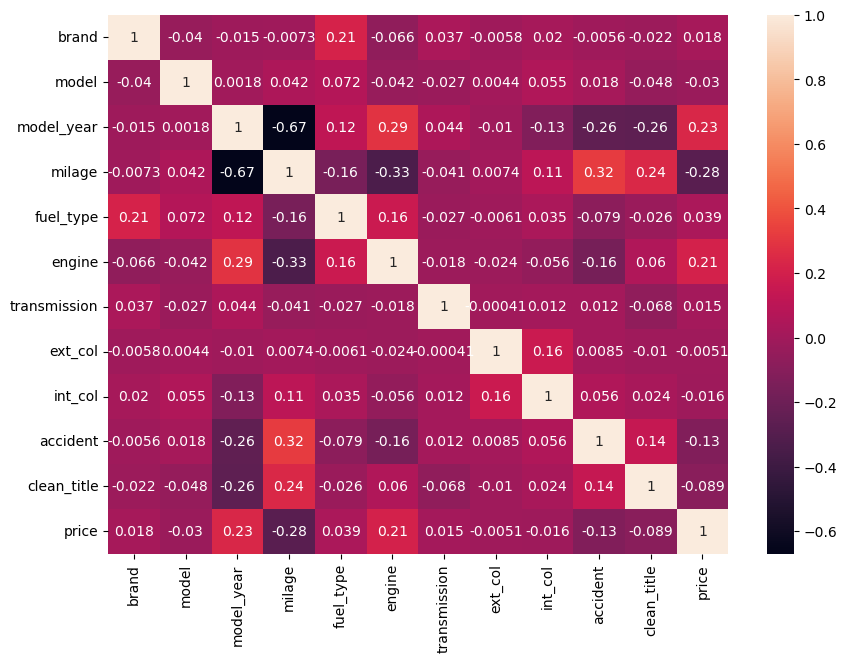

In [38]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [39]:
### Splitiing the Dependent And Independent Feature
X = df.drop('price',axis=1)
y = df['price']

In [40]:
X

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,31,495,2007,213000,2,116,38,10,3,0,1
1,28,930,2002,143250,2,366,38,3,6,1,1
2,9,1575,2002,136731,1,640,38,1,3,0,1
3,16,758,2017,19500,2,863,49,0,0,0,1
4,36,1077,2021,7388,2,259,23,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,9,6,0,1
188529,36,206,2018,28600,2,770,31,9,0,1,1
188530,36,223,2021,13650,2,921,23,9,0,0,1
188531,3,1471,2022,13895,2,512,1,9,0,0,0


In [41]:
y

0          4200
1          4999
2         13900
3         45000
4         97500
          ...  
188528    27500
188529    30000
188530    86900
188531    84900
188532    28995
Name: price, Length: 188533, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [43]:
### Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31,495,2007,213000,2,116,38,10,3,0,1,4200
1,28,930,2002,143250,2,366,38,3,6,1,1,4999
2,9,1575,2002,136731,1,640,38,1,3,0,1,13900
3,16,758,2017,19500,2,863,49,0,0,0,1,45000
4,36,1077,2021,7388,2,259,23,0,6,0,1,97500


In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
### Model Training
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [46]:
reg.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = reg.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
score

0.11899943102024924

Text(0, 0.5, 'Predicted Data')

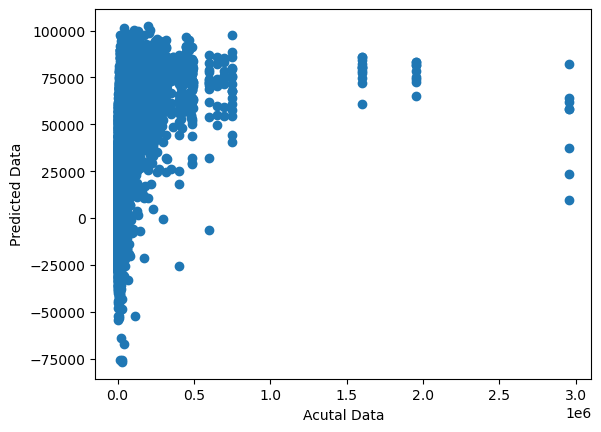

In [49]:
### Assumpotions
# 1. 
plt.scatter(y_test,y_pred)
plt.xlabel("Acutal Data")
plt.ylabel("Predicted Data")


### Testing

In [50]:
df_test = pd.read_csv('test_data_encoded.csv')

In [51]:
X = df_test.copy()

In [52]:
X.head()

,Unnamed: 0,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0,188533,26,1388,2015,98000,2,326,16,9,6,0,1
1,1,188534,26,1375,2020,9142,3,787,31,3,0,0,1
2,2,188535,14,636,2022,28121,2,541,3,9,6,0,0
3,3,188536,3,182,2016,61258,2,193,39,10,0,0,0
4,4,188537,3,181,2018,59000,2,365,38,3,0,0,1


In [53]:
X.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [54]:
y_pred = reg.predict(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [174]:
from sklearn.metrics import mean_squared_error, r2_score


def evaluate_model(true, predicted):
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true, predicted)

    return mse , rmse , score

In [175]:
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Adaboost Regressor': AdaBoostRegressor()
}

In [176]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train , y_train)
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    ## Scores
    train_mse , train_rmse, train_score = evaluate_model(y_train, y_train_pred)
    test_mse , test_rmse, test_score = evaluate_model(y_test, y_pred)

    print('------------------------------------------')
    print(list(models.keys())[i])
    print('------------------------------------------')
    print('Model Training Performance  : ')
    print(f"MSE : {train_mse}")
    print(f"RMSE : {train_rmse}")
    print(f"R2 Score : {train_score}")

    print('-------------------------------------------')
    print('Model Testing Performance  : ')
    print(f"MSE : {test_mse}")
    print(f"RMSE : {test_rmse}")
    print(f"R2 Score : {test_score}")





------------------------------------------
LinearRegression
------------------------------------------
Model Training Performance  : 
MSE : 5927198428.210017
RMSE : 76988.30059307723
R2 Score : 0.09588855304697275
-------------------------------------------
Model Testing Performance  : 
MSE : 4565615232.5780735
RMSE : 67569.3364817065
R2 Score : 0.11899943102024924
------------------------------------------
DecisionTree
------------------------------------------
Model Training Performance  : 
MSE : 41864629.280477
RMSE : 6470.288191454612
R2 Score : 0.9936141347361042
-------------------------------------------
Model Testing Performance  : 
MSE : 12816195352.539097
RMSE : 113208.63638671344
R2 Score : -1.4730676639535454
------------------------------------------
KNN
------------------------------------------
Model Training Performance  : 
MSE : 4498510579.23389
RMSE : 67070.93691930872
R2 Score : 0.31381495689981276
-------------------------------------------
Model Testing Performance